In [35]:
import pandas as pd
import math
import geopandas as gpd
from shapely.geometry import Point

In [36]:
# Read a a pckled dataframe containing lat lon.
df = pd.read_pickle('/home/aubreytensor1/Guam02/map/20201211_134207.mp4.pikl')
df

,time,lat,lon,elevation,accuracy,bearing,speed,satellites,provider,hdop,vdop,pdop,geoidheight,ageofdgpsdata,dgpsid,activity,battery,annotation
1153,2020-12-11 03:45:17.999,13.465293,144.694048,73.653534,4.0,234.71838,14.482941,27,gps,1.0,1.5,1.8,49.5,NaN,NaN,NaN,97,NaN
1154,2020-12-11 03:45:18.999,13.465215,144.693941,73.658495,4.0,233.24323,14.306335,24,gps,0.9,1.4,1.6,49.5,NaN,NaN,NaN,97,NaN
1155,2020-12-11 03:45:20.999,13.465053,144.693739,73.660075,4.0,229.16808,14.151920,26,gps,0.9,1.4,1.6,49.5,NaN,NaN,NaN,97,NaN
1156,2020-12-11 03:45:22.999,13.464881,144.693540,73.728305,4.0,229.02380,14.350318,25,gps,1.0,1.3,1.6,49.5,NaN,NaN,NaN,97,NaN
1157,2020-12-11 03:45:23.999,13.464795,144.693440,73.747476,4.0,228.97200,14.362541,26,gps,1.0,1.3,1.6,49.5,NaN,NaN,NaN,97,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,2020-12-11 04:19:09.000,13.268123,144.664911,72.118045,4.0,152.32211,10.949270,23,gps,0.9,1.6,1.9,49.5,NaN,NaN,NaN,100,NaN
2308,2020-12-11 04:19:11.000,13.267967,144.665011,71.703881,4.0,143.55989,10.322861,25,gps,0.9,1.6,1.9,49.5,NaN,NaN,NaN,100,NaN
2309,2020-12-11 04:19:13.000,13.267842,144.665137,72.089352,4.0,127.64044,9.609566,26,gps,1.0,1.6,1.8,49.5,NaN,NaN,NaN,100,NaN
2310,2020-12-11 04:19:15.000,13.267758,144.665269,72.296592,4.0,115.41876,8.530318,26,gps,0.9,1.6,1.8,49.5,NaN,NaN,NaN,100,NaN


<AxesSubplot:>

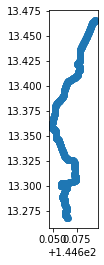

In [37]:
# Convert dataframe to a geodataframe
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lat', 'lon'], axis=1)
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
gdf.plot()

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

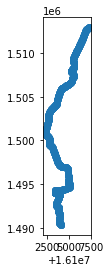

In [39]:
# Reproject geometry to UTM (meters)
gdf = gdf.to_crs('EPSG:3857')
gdf.plot()
gdf.crs

In [41]:
math.sqrt( (gdf.lon - gdf.lon.shift(1))**2 + (gdf.lat - gdf.lat.shift(1)**2) )

AttributeError: 'GeoDataFrame' object has no attribute 'lon'

In [9]:
dfgps.lon - dfgps.lon.shift(1)

1153         NaN
1154   -0.000107
1155   -0.000202
1156   -0.000199
1157   -0.000100
          ...   
2307    0.000088
2308    0.000101
2309    0.000126
2310    0.000132
2311    0.000136
Name: lon, Length: 1159, dtype: float64

In [11]:
import geopandas as gpd
from shapely.geometry import Point
geom=[Point(xy) for xy in zip([117.454361,117.459880],[38.8459879,38.846255])]
gdf=gpd.GeoDataFrame(geometry=geom,crs={'init':'epsg:4326'})
gdf.to_crs(epsg=3857,inplace=True)
l=gdf.distance(gdf.shift())
print(l)

0           NaN
1    615.557277
dtype: float64


/home/aubreytensor1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  
